In [1]:
#Paquetes Basicos------------------------------
import numpy as np
from numpy.random import uniform
import matplotlib.pyplot as plt


#Para el manejo de algebra lineal---------------
from numpy.linalg import *
from scipy.linalg import expm,inv

#Para los plots 3D -----------------------------
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



In [2]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression #para hacer regresiones lineales
from sklearn.cross_validation import train_test_split #para separar datos entre datos de test y entrenamiento
from sklearn import metrics # para medir (metricas) errores, etc.
from sklearn.decomposition import PCA
pca = PCA()#n_components=len(WINE[:,0]))



/usr/local/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:

FILE=open("datos.csv","r")
lineas=FILE.readlines()
DATOS=[]

for linea in lineas:
    variable=list(map(float,linea.split(",")[1:]))
    print(float,linea.split(",")[0])
    variable-=np.mean(variable)
    variable=variable/np.sqrt(np.var(variable))
    DATOS.append(variable)
    


<class 'float'> Indicator Name\Year
<class 'float'> Employment in industry (% of total employment) (modeled ILO estimate)
<class 'float'> "Vulnerable employment total (% of total employment) (modeled ILO estimate)"
<class 'float'> "Vulnerable employment male (% of male employment) (modeled ILO estimate)"
<class 'float'> "Vulnerable employment female (% of female employment) (modeled ILO estimate)"
<class 'float'> "Employment to population ratio 15 total (%) (modeled ILO estimate)"
<class 'float'> "Self-employed total (% of total employment) (modeled ILO estimate)"
<class 'float'> "Employers total (% of total employment) (modeled ILO estimate)"
<class 'float'> Terms of trade adjustment (constant LCU)
<class 'float'> Gross domestic savings (current US$)
<class 'float'> Total natural resources rents (% of GDP)
<class 'float'> Domestic credit to private sector (% of GDP)
<class 'float'> Domestic credit provided by financial sector (% of GDP)
<class 'float'> "Interest rate spread (lending r

In [27]:
pca.fit(DATOS)
np.shape(pca.components_)

(20, 24)

Text(0,0.5,'Cuanto explica cada componente')

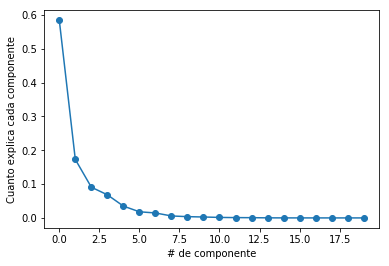

In [28]:
plt.plot(pca.explained_variance_ratio_,"-o")
plt.xlabel("# de componente")
plt.ylabel("Cuanto explica cada componente")


[0.58443493 0.75733476 0.84815913 0.91651637 0.95152713 0.969643
 0.98428465 0.99008578 0.99382151 0.99655992 0.99802519 0.99893111
 0.99964573 0.99987392 0.99995536 0.99999012 0.99999951 1.
 1.         1.        ]


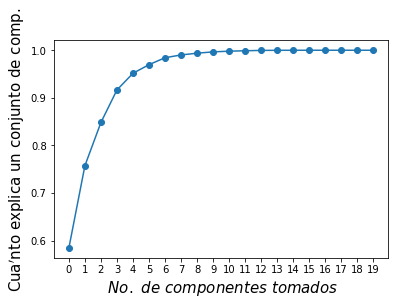

In [30]:
Suma=np.zeros(len(pca.explained_variance_ratio_))
suma=0
for i in range(len(Suma)):
    suma+=pca.explained_variance_ratio_[i]
    Suma[i]=suma

plt.plot(range(len(Suma))+np.ones(len(Suma)),Suma,"-o")    
plt.xlabel(" $ No.\ de\ componentes\ tomados\ $",size=15)
plt.ylabel("$ \mathrm{Cua\'nto\ explica\ un\ conjunto\ de\ comp.} $",size=15)
lista=range(0,len(Suma))
ticks=[str(i) for i in lista]
plt.xticks(range(len(Suma))+np.ones(len(Suma)),ticks)
print(Suma)